### Data-driven Healthcare: Part 1 - Data Preparation 

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading a dataset: Diabetes 

In [2]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
'''
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based 
on certain diagnostic measurements included in the dataset. Several constraints were placed on the
selection of these instances from a larger database. In particular, all patients here are females 
at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
'''

# Importing the dataset
# Diabetes.csv
Diabetes = pd.read_csv('https://github.com/dnzengou/data-driven-heathcare/Module-2/data/Diabetes.csv',encoding="utf8")
Diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Dataset summary

In [3]:
Diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### List of columns and fields

In [4]:
# List of columns
list(Diabetes)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### Quartiles and outliers

In [5]:
column_='BMI'
print(np.percentile(Diabetes[column_], 50))
q75, q25 = np.percentile(Diabetes[column_], [75 ,25])
iqr = q75 - q25
Diabetes[column_][Diabetes[column_]>1.5*iqr+q75]

32.0


120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64

### Box plot for visualizing the data range

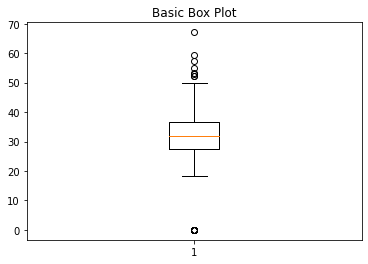

In [6]:
# Boxplot with Matplotlib
fig, ax = plt.subplots()
ax.set_title('Basic Box Plot')
ax.boxplot(Diabetes[column_])
plt.show()

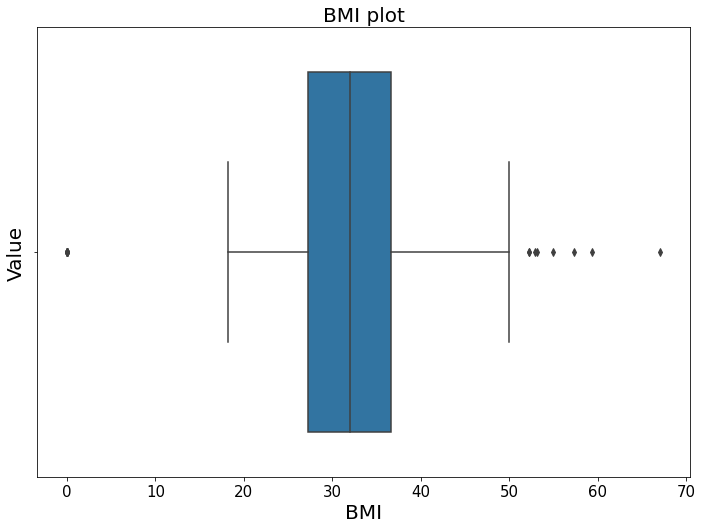

In [7]:
# Boxplot with Seaborn

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=Diabetes[column_])
ax.set(
    xlabel=column_, 
    ylabel='Value'
)
ax.axes.set_title(column_+" plot",fontsize=20)
ax.set_xlabel(column_,fontsize=20)
ax.set_ylabel("Value",fontsize=20)
ax.tick_params(labelsize=15)


### Box plot based on different features (columns)

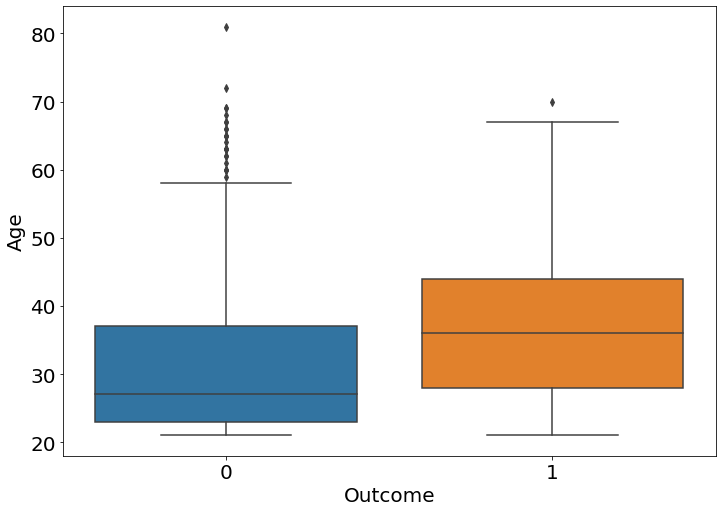

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x="Outcome", y="Age", data=Diabetes)

ax.set_ylabel('Age', fontsize = 20.0) # Y label
ax.set_xlabel('Outcome', fontsize = 20) # X label
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=20)

### Pivot table

In [9]:
group = 'Outcome'
column_ = 'BMI'
agg_function = np.mean 

pivot_year=pd.pivot_table(Diabetes,index=[group],values=[column_],aggfunc=agg_function)
pivot_year=pivot_year.reset_index()
pivot_year

Outcome        BMI
0        0  30.304200
1        1  35.142537

### Data shape

Text(0, 0.5, 'Frequency')

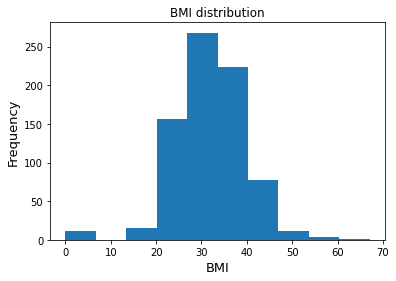

In [10]:
Diabetes['BMI'].plot(kind='hist', title='BMI distribution')
plt.xlabel('BMI', fontsize=13)
plt.ylabel('Frequency', fontsize=13)


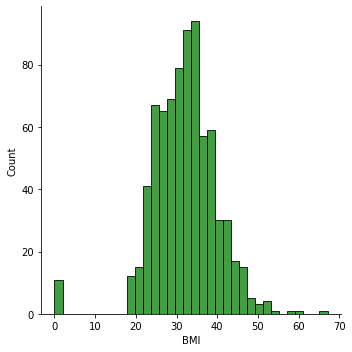

In [11]:
import seaborn as sns
from scipy.stats import norm

ax = sns.displot(Diabetes['BMI'],color="g")

### Standard deviation in a column

In [12]:
np.std(Diabetes['Age'])

11.752572645994178

### Skewness and Kurtosis

In [13]:
Diabetes.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [14]:
Diabetes.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

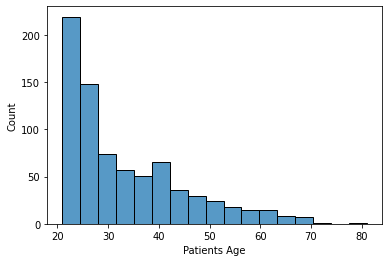

In [15]:
ax = sns.histplot(Diabetes['Age']);
ax.set(xlabel='Patients Age', ylabel='Count')
plt.show()


/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


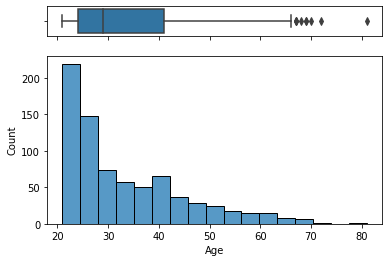

In [16]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Diabetes['Age'], ax=ax_box)
sns.histplot(data=Diabetes, x="Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()


/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


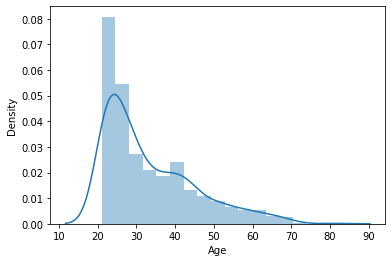

In [17]:
sns.distplot(Diabetes['Age']);

### Mean, Median, and Mode

In [18]:
# sns.distplot(music['spch'], bins='auto');
from scipy import stats

field=Diabetes['Age']
#mean value
mean= np.mean(field)

#median value
median = np.median(field)

#mode value
mode= stats.mode(field)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  33.240885416666664
Median:  29.0
Mode:  ModeResult(mode=array([22]), count=array([72]))


### Nomalize the columns

/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


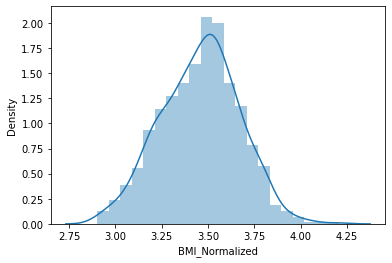

In [19]:
# Normalize the column
from scipy.stats import boxcox


column_ = 'BMI'
Diabetes_selected = Diabetes[Diabetes[column_]>0]

# Z-score
# Diabetes_selected[column_+'_Normalized'] = Diabetes_selected[column_]-Diabetes_selected[column_].mean()/Diabetes_selected[column_].std()

# Min Max Normalization
# Diabetes_selected[column_+'_Normalized'] = Diabetes_selected.apply(
#                         lambda x: np.sign(x[column_])* math.log10(1+ abs(x[column_])), axis=1)


# Standardize varibales using boxcox
Diabetes_selected[column_+'_Normalized'] =  boxcox(Diabetes_selected[column_],0) 

# Coxbox parameter 
# lambda = -1. is a reciprocal transform.
# lambda = -0.5 is a reciprocal square root transform.
# lambda = 0.0 is a log transform.
# lambda = 0.5 is a square root transform.
# lambda = 1.0 is no transform

sns.distplot(Diabetes_selected[column_+'_Normalized'], bins='auto');


<AxesSubplot:>

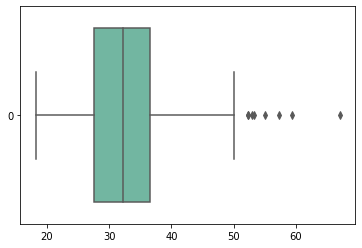

In [20]:
sns.boxplot(data=Diabetes_selected[column_],orient="h", palette="Set2")

<AxesSubplot:>

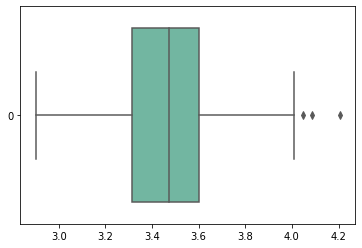

In [21]:
sns.boxplot(data=Diabetes_selected[column_+'_Normalized'],orient="h", palette="Set2")

### Normalization and Scaling using SKlearn

In [83]:
import pandas as pd
from sklearn import preprocessing

data = Diabetes[Diabetes.columns[1:7]]
cols = data.columns
df = pd.DataFrame(data)
df

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized


Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    0.743719       0.590164       0.353535  0.000000  0.500745   
1    0.427136       0.540984       0.292929  0.000000  0.396423   
2    0.919598       0.524590       0.000000  0.000000  0.347243   
3    0.447236       0.540984       0.232323  0.111111  0.418778   
4    0.688442       0.327869       0.353535  0.198582  0.642325   
..        ...            ...            ...       ...       ...   
763  0.507538       0.622951       0.484848  0.212766  0.490313   
764  0.613065       0.573770       0.272727  0.000000  0.548435   
765  0.608040       0.590164       0.232323  0.132388  0.390462   
766  0.633166       0.491803       0.000000  0.000000  0.448584   
767  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction  
0                    0.234415  
1                    0.116567  
2                    0.253629  
3                    0.038002  
4                    0.943638  
..                        ...  
763                  0.039710  
764                  0.111870  
765                  0.071307  
766                  0.115713  
767                  0.101196  

[768 rows x 6 columns]

<AxesSubplot:>

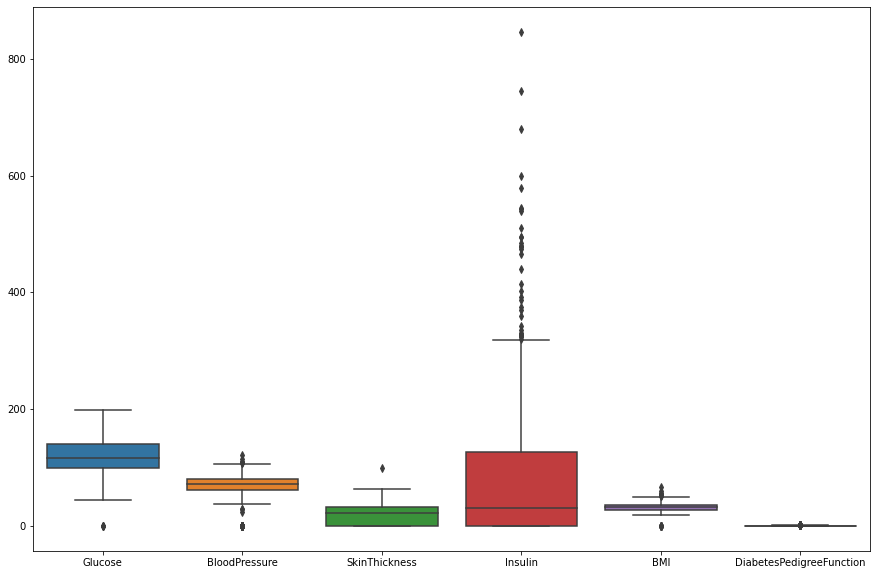

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=Diabetes[Diabetes.columns[1:7]])

<AxesSubplot:>

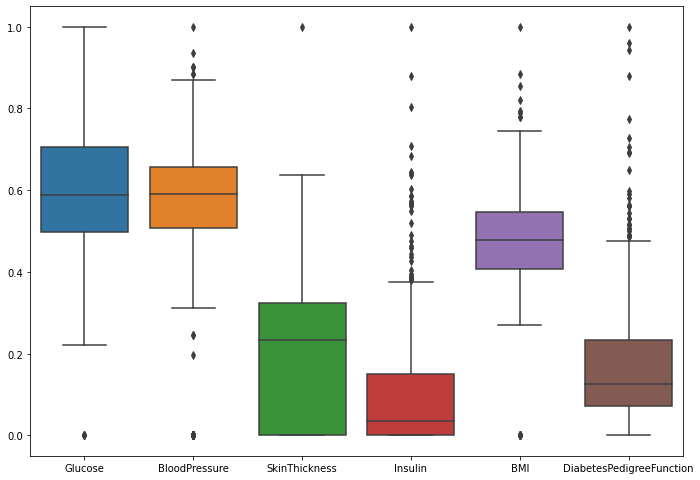

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=df_normalized)

### Scalling using Sklearn

/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

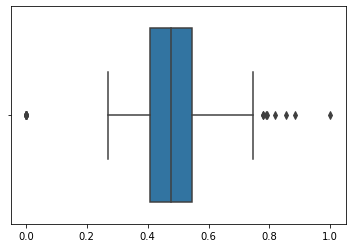

In [26]:
from sklearn.preprocessing import MinMaxScaler
from pandas import Series

series = Series(Diabetes[column_])

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print
normalized = scaler.transform(values)
# print(normalized)
sns.boxplot(normalized)

#### If Data Is Gaussian, Use Parametric Statistical Methods, Else: Use Nonparametric Statistical Methods. 

### Quantile-Quantile Plot
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.



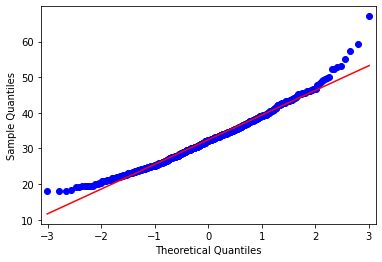

In [32]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(Diabetes_selected[column_], line='s')
pyplot.show()

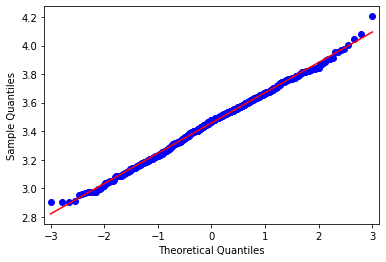

In [33]:
qqplot(Diabetes_selected[column_+'_Normalized'], line='s')
pyplot.show()

### Statistical Normality Tests
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution. Each test makes different assumptions and considers different aspects of the data.We will look at 3 commonly used tests in this section that you can apply to your own data samples.Each test will return at least two things:
- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. I
The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value. In the SciPy implementation of these tests, you can interpret the p value as follows.

- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution. A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

### Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.



In [35]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# column to check normality
# column_check =  Diabetes_selected[column_+'_Normalized']
column_check =  Diabetes_selected[column_]

# normality test
stat, p = shapiro(column_check)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


In [27]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(column_check)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.860, p=0.650
Sample looks Gaussian (fail to reject H0)


In [36]:
from scipy.stats import chisquare
# normality test
stat, p = chisquare(column_check)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1116.980, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
from statsmodels.stats.diagnostic import lilliefors
# normality test
stat, p = lilliefors(column_check)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.035, p=0.028
Sample does not look Gaussian (reject H0)


In [38]:
from scipy.stats import kstest
# normality test
stat, p = kstest(column_check, 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)


### Correlation between variables

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

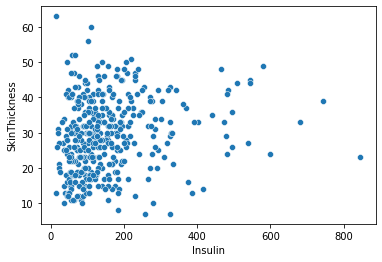

In [39]:
#Visualizing the correlations using scatter plot
sns.scatterplot(data=Diabetes[Diabetes['Insulin']>0],x='Insulin',y='SkinThickness')

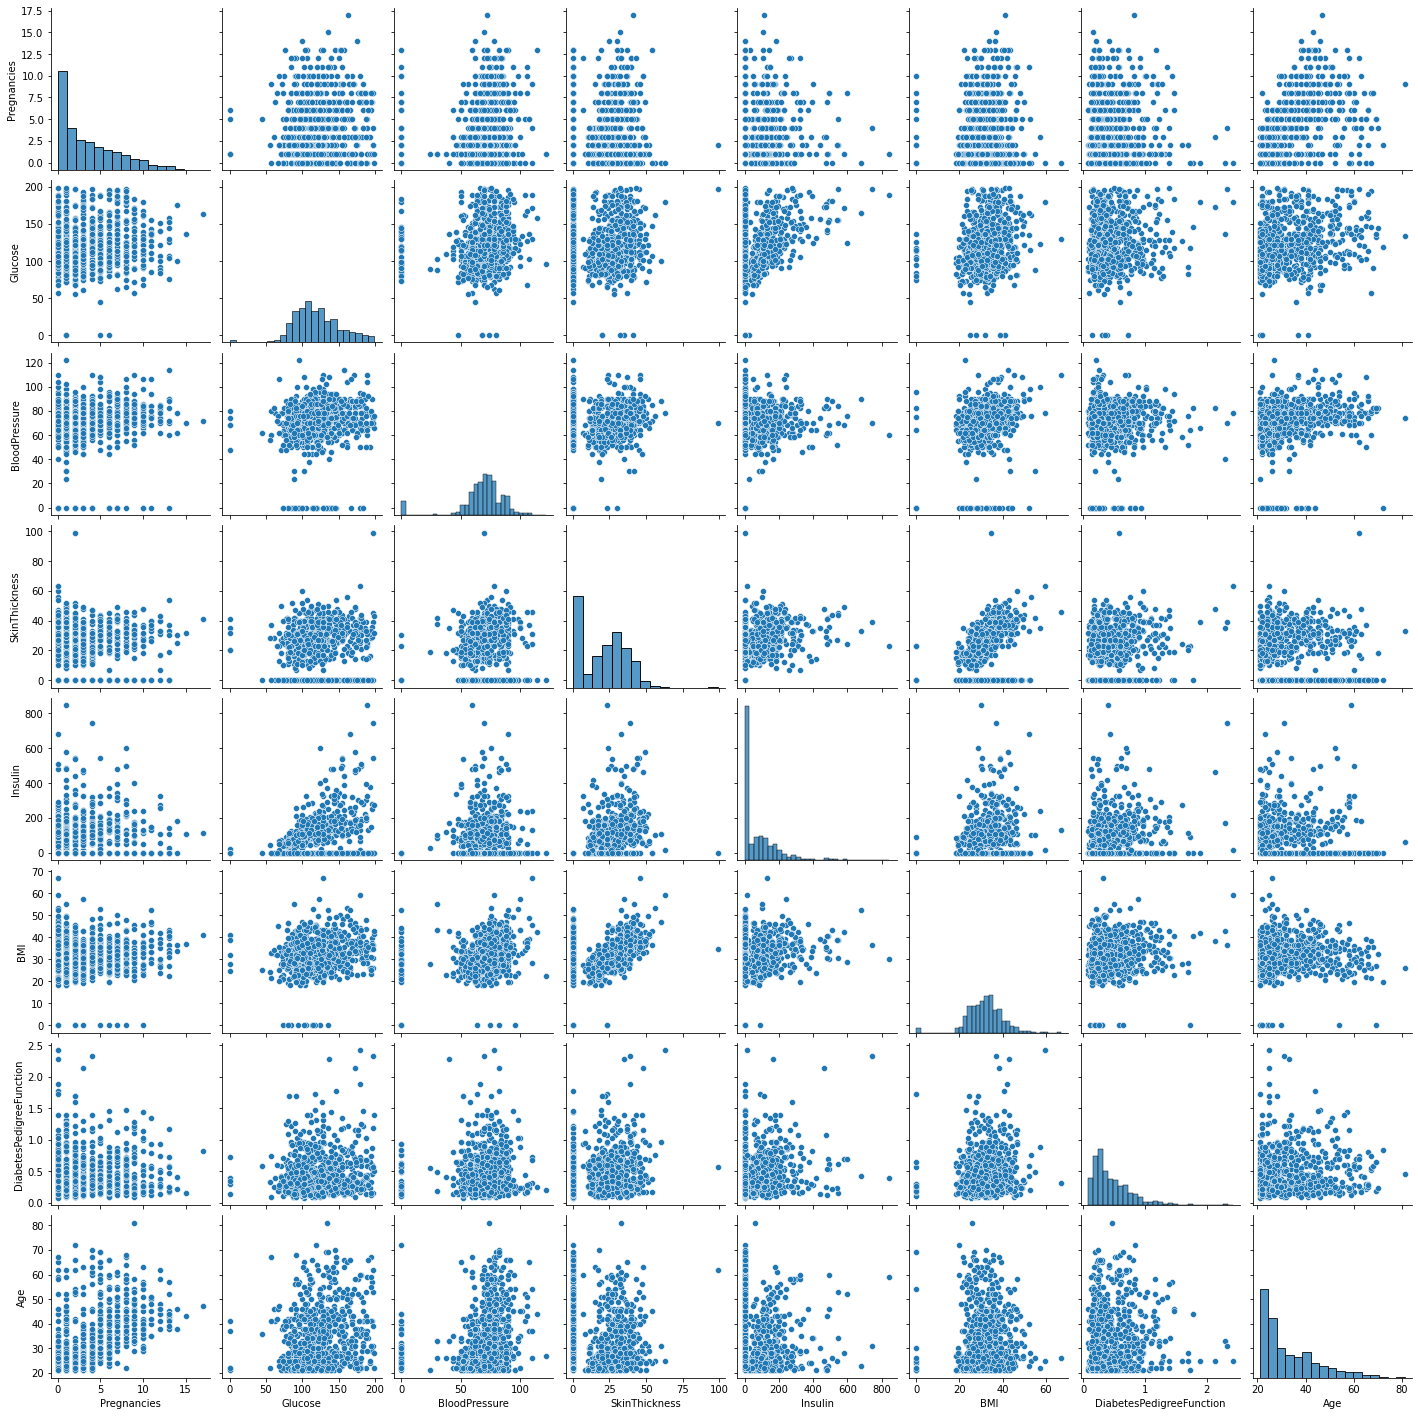

In [40]:
sns.pairplot(Diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness',
                      'Insulin','BMI','DiabetesPedigreeFunction','Age']])

<AxesSubplot:>

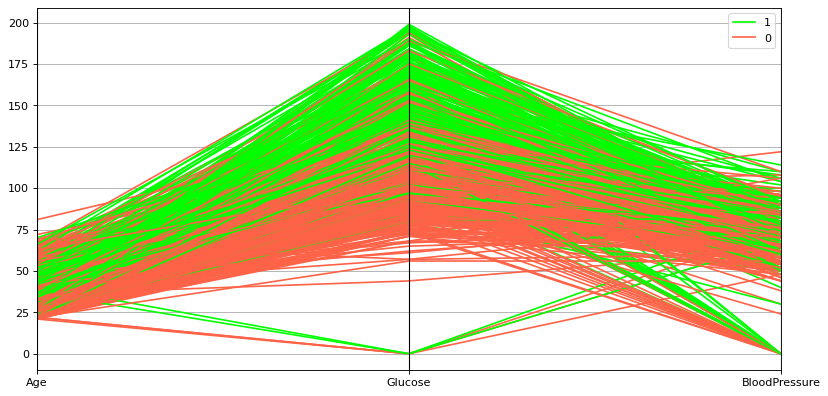

In [41]:
# Finding the relationship between the features
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

# pd.plotting.parallel_coordinates(
#     Diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness',
#                       'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']],'Outcome',color=["lime", "tomato"])

pd.plotting.parallel_coordinates(
    Diabetes[['Age','Glucose','BloodPressure','Outcome']],'Outcome',color=["lime", "tomato"])


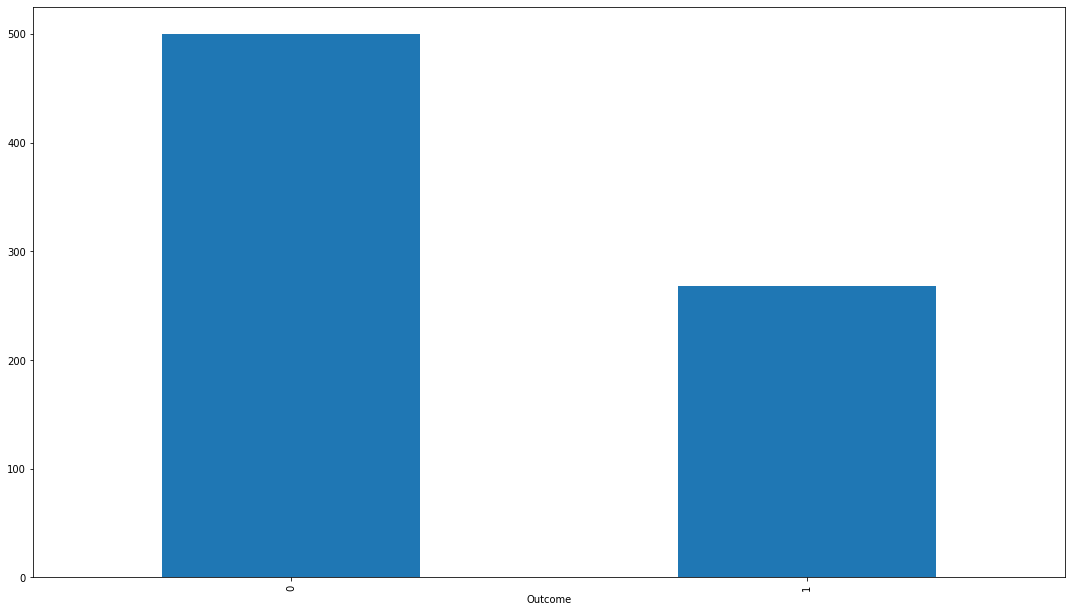

In [42]:
# Grouping the dataset based on different features
Diabetes_group=Diabetes.groupby(['Outcome'])['Outcome'].count()
ax = Diabetes_group.transpose().plot(kind='bar', stacked=True, figsize=(18.5, 10.5))

In [43]:
# with sklearn
# ***************** LA and Clusters  **************
from scipy.stats import pearsonr,linregress,spearmanr,kendalltau
import numpy as np
print('******************* Correlation between LA and Clusters ******************')
X=Diabetes['Insulin']
Y=Diabetes['SkinThickness']

# calculate Pearson's correlation
r, p = pearsonr(X, Y)
print('\nPearsons correlation: %.5f' % r, ' p-value: %.5f' % p)
print('=========================================================')

# calculate Pearson's correlation
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
print('\nlinregress: %.5f'  %r_value, '  P-VALUE: %.5f' % p_value)
print('=========================================================')

print('\nNumpy correlation: %.5f'% np.corrcoef(X, Y)[0, 1])
print('=========================================================')

r, p = spearmanr(X, Y)
print('\nSpearmans rho: %.5f'% r, '  P-VALUE: %.5f' %p)
print('=========================================================')

r, p = kendalltau(X, Y)
print('\nKendall rho: %.5f' % r, '  P-VALUE: %.5f' %p)
print('=========================================================')


******************* Correlation between LA and Clusters ******************

Pearsons correlation: 0.43678  p-value: 0.00000

linregress: 0.43678   P-VALUE: 0.00000

Numpy correlation: 0.43678

Spearmans rho: 0.54100   P-VALUE: 0.00000

Kendall rho: 0.42007   P-VALUE: 0.00000


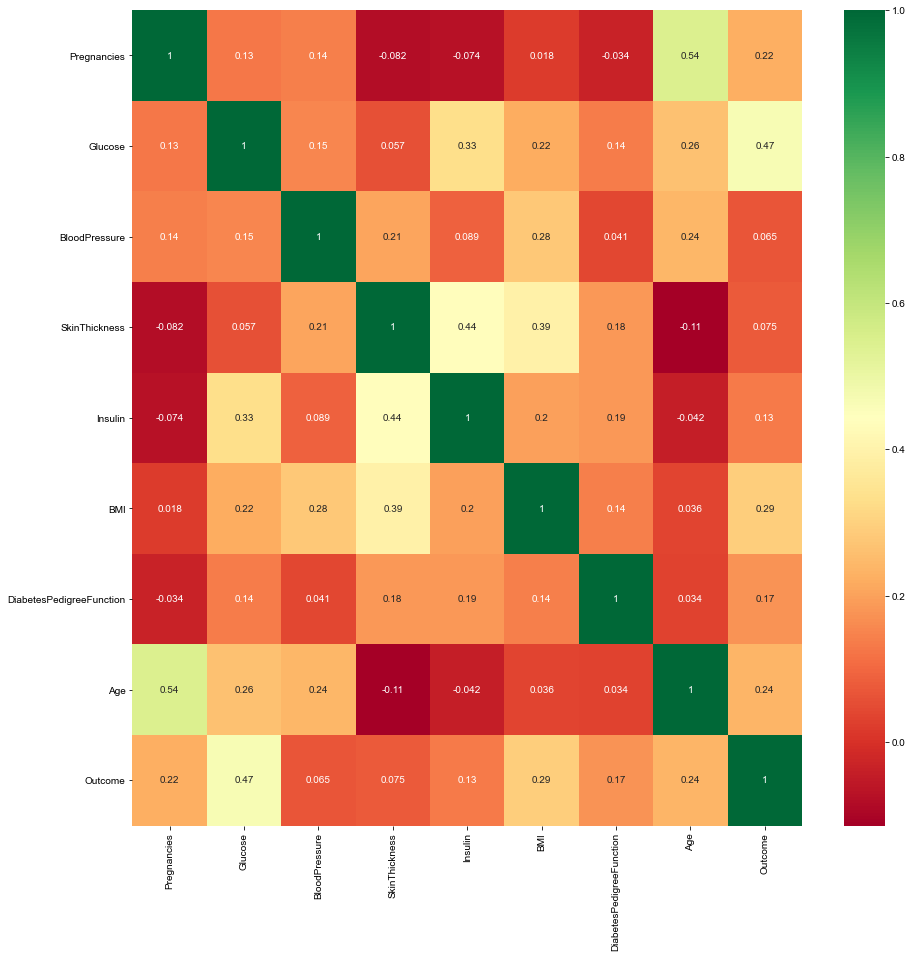

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
g=sns.heatmap(Diabetes.corr(),annot=True,cmap="RdYlGn")
sns.set(font_scale=1.2)

Correlation states how the features are related to each other or the target variable. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

### Finding Important features using Pearson 

We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.


In [75]:
X = Diabetes.iloc[:,0:8]  #independent columns
y = Diabetes.iloc[:,-1]    #target column i.e price range

In [76]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [77]:
def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, 4)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

4 selected features
['Pregnancies', 'Age', 'BMI', 'Glucose']


### Finding Important features Chi-Squared

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [78]:
from sklearn.feature_selection import SelectKBest, chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


### Backward Elimination

We feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.
The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features. Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [79]:
import statsmodels.api as sm

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
# model.pvalues
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


### RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## Embedded Method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.


Best alpha using built-in LassoCV: 0.007166
Best score using built-in LassoCV: 0.301033


Text(0.5, 1.0, 'Feature importance using Lasso Model')

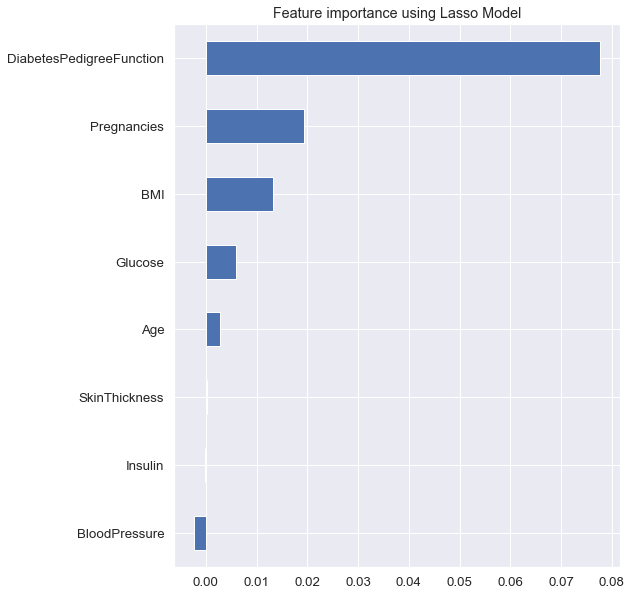

In [81]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


## Feature Importance

It is another type of feature selection. You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

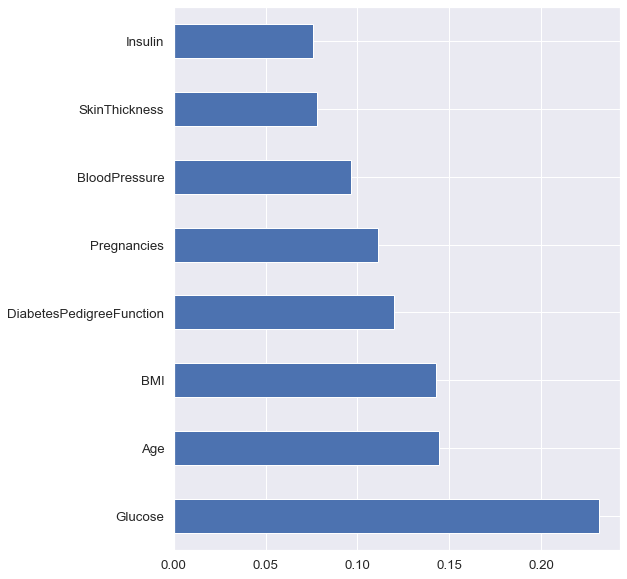

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Splitting the dataset into train and test sets

In [88]:
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 70% training and 30% test

# X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
# X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

# perform a robust scaler transform of the dataset
# trans = StandardScaler()
# X_train = trans.fit_transform(X_train)
# X_test = trans.fit_transform(X_test)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
285            7      136             74             26      135  26.0   
101            1      151             60              0        0  26.1   
581            6      109             60             27        0  25.0   
352            3       61             82             28        0  34.4   
726            1      116             78             29      180  36.1   
..           ...      ...            ...            ...      ...   ...   
247            0      165             90             33      680  52.3   
189            5      139             80             35      160  31.6   
139            5      105             72             29      325  36.9   
518           13       76             60              0        0  32.8   
629            4       94             65             22        0  24.7   

     DiabetesPedigreeFunction  Age  
285                     0.647   51  
101                     0.179   22  
581                     0.206   27  
352                     0.243   46  
726                     0.496   25  
..                        ...  ...  
247                     0.427   23  
189                     0.361   25  
139                     0.159   28  
518                     0.180   41  
629                     0.148   21  

[192 rows x 8 columns]